## Show Environment Use

Render a sample run through the of environment with random actions. 

In [18]:
from AppalachianRL.envs.trail import AppalachianTrailEnv

env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()

Day 1: 2192.0 miles left | Energy 99.2 | Food 9.8 | Weather 0
Day 2: 2181.0 miles left | Energy 97.8 | Food 9.7 | Weather 2
Day 3: 2170.0 miles left | Energy 96.3 | Food 9.5 | Weather 2
Day 4: 2170.0 miles left | Energy 100.0 | Food 9.4 | Weather 2
Day 5: 2168.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 6: 2168.0 miles left | Energy 100.0 | Food 10.0 | Weather 0
Day 7: 2168.0 miles left | Energy 100.0 | Food 9.9 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 8: 2168.0 miles left | Energy 100.0 | Food 9.9 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 9: 2168.0 miles left | Energy 100.0 | Food 9.9 | Weather 0
Day 10: 2155.0 miles left | Energy 97.5 | Food 9.7 | Weather 2
Day 11: 2130.0 miles left | Energy 92.0 | Food 9.5 | Weather 1
Day 12: 2122.0 miles left | Energy 91.2 | Food 9.3 | Weather 0
Day 13: 2100.0 miles left | Energy 86.8 | Food 9.1 | Weather 0
Day 14: 2090.0 miles left | Energy 96.8 | Food 

## Test Solvers

Run episodes on solvers to test how well they stack up. Include random actions for comparison.


Training Random...
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply poin

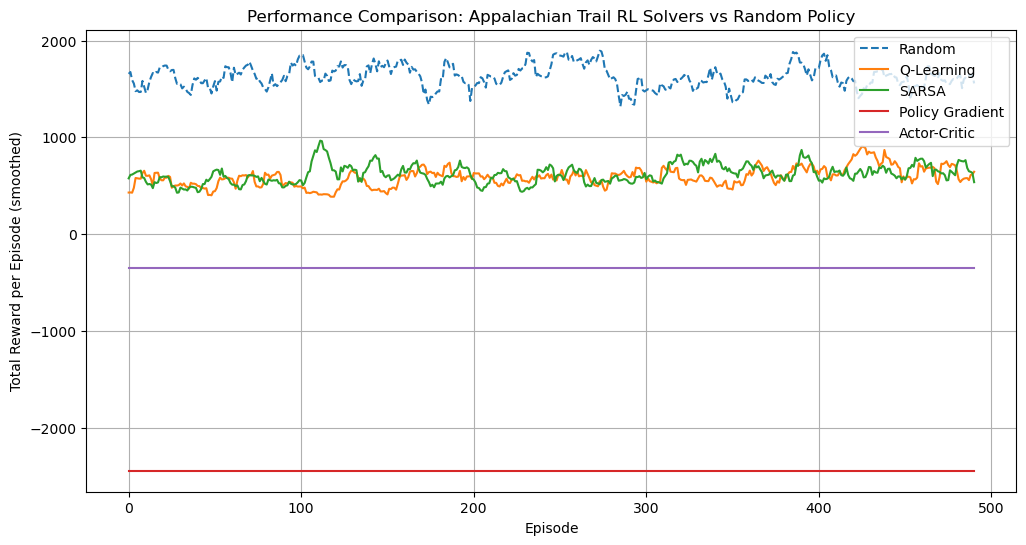

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent

from AppalachianRL.solvers.actor_critic import ActorCriticSolver


# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Random": RandomAgent(env, seed=SEED),
    "Q-Learning": QLearningSolver(env, seed=SEED),
    "SARSA": SarsaSolver(env, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
    "Actor-Critic": ActorCriticSolver(env, seed=SEED),
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    if name == "Random": plt.plot(smoothed, label=name, linestyle='--')  # dashed line for Random
    else: plt.plot(smoothed, label=name) # solid for others


plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()


## Test Advanced Environment


Training Random...
Episode 50/500 | Reward: 185.5
Episode 100/500 | Reward: 286.9
Episode 150/500 | Reward: 151.1
Episode 200/500 | Reward: 225.0
Episode 250/500 | Reward: 266.6
Episode 300/500 | Reward: 85.9
Episode 350/500 | Reward: 434.9
Episode 400/500 | Reward: 299.3
Episode 450/500 | Reward: 249.8
Episode 500/500 | Reward: 136.7

Training Q-Learning...
Episode 50/500 | Reward: 36.3
Episode 100/500 | Reward: 7.7
Episode 150/500 | Reward: 22.1
Episode 200/500 | Reward: 159.0
Episode 250/500 | Reward: 14.8
Episode 300/500 | Reward: 17.7
Episode 350/500 | Reward: 78.3
Episode 400/500 | Reward: 31.3
Episode 450/500 | Reward: 16.3
Episode 500/500 | Reward: 122.6

Training SARSA...
Episode 50/500 | Reward: 90.1
Episode 100/500 | Reward: 0.4
Episode 150/500 | Reward: 66.9
Episode 200/500 | Reward: 113.5
Episode 250/500 | Reward: 81.5
Episode 300/500 | Reward: 80.1
Episode 350/500 | Reward: -2.4
Episode 400/500 | Reward: 63.8
Episode 450/500 | Reward: -21.7
Episode 500/500 | Reward: 113.

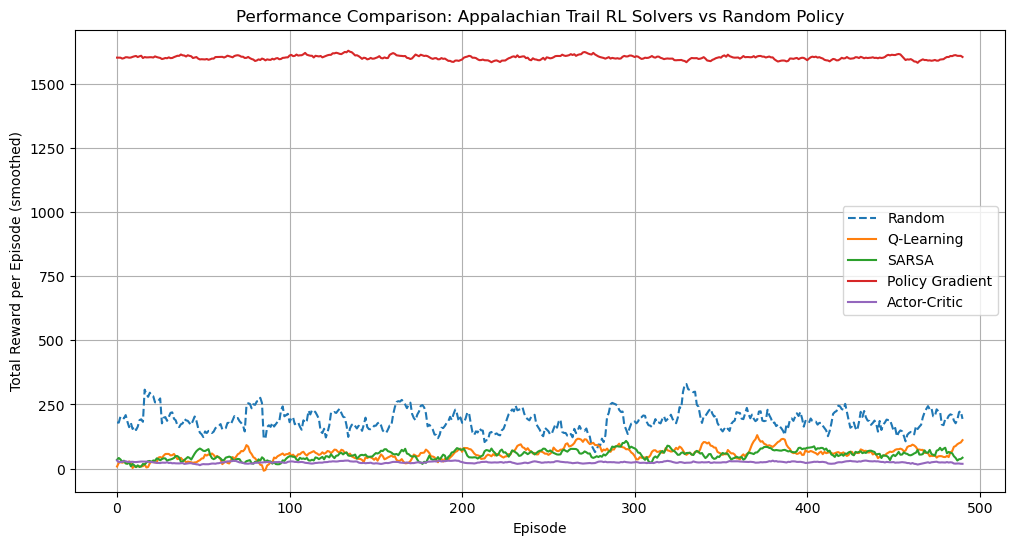

In [21]:

from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Random": RandomAgent(env, seed=SEED),
    "Q-Learning": QLearningSolver(env, seed=SEED),
    "SARSA": SarsaSolver(env, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
    "Actor-Critic": ActorCriticSolver(env, seed=SEED),
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    if name == "Random": plt.plot(smoothed, label=name, linestyle='--')  # dashed line for Random
    else: plt.plot(smoothed, label=name) # solid for others


plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()


Training Random...
Episode 50/500 | Reward: 1699.2
Episode 100/500 | Reward: 1775.5
Episode 150/500 | Reward: 1743.0
Episode 200/500 | Reward: 2295.8
Episode 250/500 | Reward: 2297.8
Episode 300/500 | Reward: 2279.8
Episode 350/500 | Reward: 1769.0
Episode 400/500 | Reward: 1569.5
Episode 450/500 | Reward: 1752.8
Episode 500/500 | Reward: 1709.2

Training Q-Learning...
Episode 50/500 | Reward: 1676.5
Episode 100/500 | Reward: 1750.2
Episode 150/500 | Reward: 1673.8
Episode 200/500 | Reward: 2314.5
Episode 250/500 | Reward: 1780.5
Episode 300/500 | Reward: 1735.5
Episode 350/500 | Reward: 1706.5
Episode 400/500 | Reward: 2301.0
Episode 450/500 | Reward: 2311.0
Episode 500/500 | Reward: 2319.2

Training SARSA...
Episode 50/500 | Reward: 1668.0
Episode 100/500 | Reward: 2323.2
Episode 150/500 | Reward: 2319.0
Episode 200/500 | Reward: 2317.2
Episode 250/500 | Reward: 2329.2
Episode 300/500 | Reward: 2326.5
Episode 350/500 | Reward: 2322.8
Episode 400/500 | Reward: 2301.0
Episode 450/500 

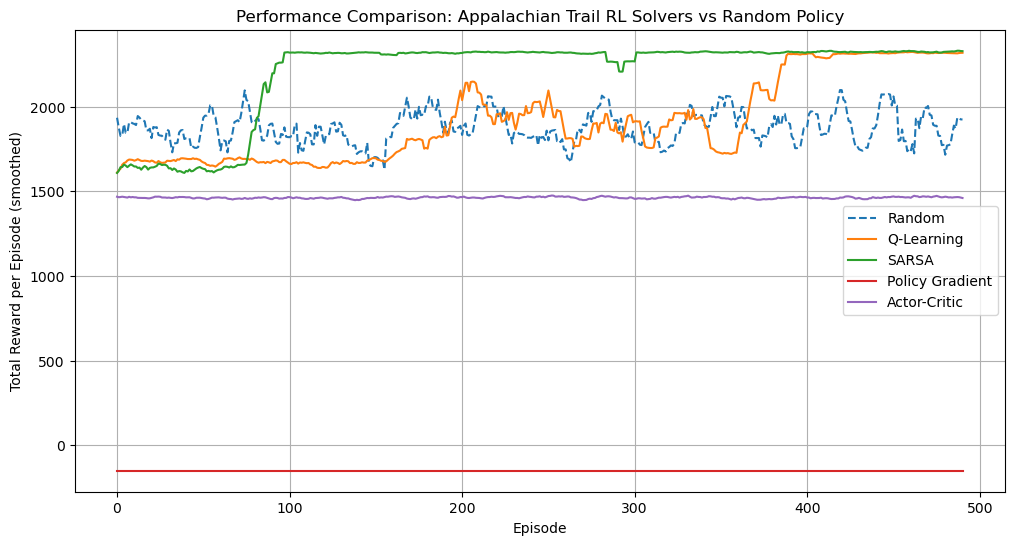

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent

from AppalachianRL.solvers.actor_critic import ActorCriticSolver


# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

from AppalachianRL.envs.trail2 import AppalachianTrailEnv2

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailEnv2(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Random": RandomAgent(env, seed=SEED),
    "Q-Learning": QLearningSolver(env, seed=SEED),
    "SARSA": SarsaSolver(env, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, seed=SEED),
    "Actor-Critic": ActorCriticSolver(env, seed=SEED),
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    if name == "Random": plt.plot(smoothed, label=name, linestyle='--')  # dashed line for Random
    else: plt.plot(smoothed, label=name) # solid for others


plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()